# Actividad 1 - Análisis Exploratorio WIDS 2024

En esta tarea se trabaja con los datos del reto WIDS Datathon 2024 (https://www.kaggle.com/competitions/widsdatathon2024-challenge1) de Kaggle, enfocado en el diagnostico temprano de cáncer de mama y variables asociadas al estado de salud y de residencia de pacientes.

###### By: Jessica Jazmin Castillo Rios


In [34]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuracion para graficos y tablas
pd.set_option("display.max_columns", 100)
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (30,30)


### 1. Importación y revisión general

In [35]:
# Cargamos los datasets
df_train = pd.read_csv('Dataset/training.csv')
df_test = pd.read_csv('Dataset/test.csv')

# Mostramos las 10 primeras filas del df
display(df_train.head(10))
display(df_test.head(10))

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.750000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.878790,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.683330,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.325580,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,Midwest,East North Central,5441.435484,85.620968,40.880328,12.732258,14.088710,10.659677,11.625806,11.208065,15.619355,12.322581,8.409677,3.343548,49.154839,50.845161,55.175806,13.982258,24.266129,6.583871,3.073226,52.980645,66187.22807,1.611290,1.277419,2.645161,3.853226,3.172581,13.275806,12.633871,21.485484,16.717742,15.238710,8.070968,23.309677,33553.43333,84.112903,2064.741935,1.527495e+05,825.122449,23.895455,12.429032,40.667742,28.959677,11.895161,6.046774,17.941935,35.591379,63.303226,3.406557,10.655357,5.551786,94.793548,0.364516,0.303226,0.119355,0.009677,0.770968,3.630645,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C787,NaN,NaN,South,South Atlantic,19613.820510,1555.107692,49.107692,8.069231,8.587179,10.684615,11.302564,10.971795,15.823077,15.902564,11.828205,6.815385,49.658974,50.341026,44.800000,17.779487,29.102564,8.310256,2.917105,46.665789,64711.71053,3.873684,2.044737,3.807895,4.239474,4.242105,9.347368,13.018421,17.373684,12.889474,14.442105,14.702632,29.144737,34678.61538,68.673684,8502.230769,2.658606e+05,1343.394737,34.957895,8.379487,26.558974,30.200000,22.100000,12.764103,34.864103,43.250000,57.035897,5.002632,11.564103,0.005128,78.217949,10.889744,3.453846,0.187179,0.076923,1.841026,5.328205,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C773,NaN,NaN,West,Pacific,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.674783,59.219565,86330.39130,2.226087,1.528261,2.897826,2.747826,3.173913,6.647826,9.617391,15.965217,13.589130,19.752174,21.847826,41.600000,34317.82609,61.397826,12609.260870,5.726065e+05,1778.000000,34.595652,17.491304,22.656522,29.263043,20.200000,10.404348,30.604348,46.208696,63.154348,6.197826,15.708696,0.015217,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C779,NaN,NaN,West,Pacific,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,

In [36]:
# Se imprimen las dimensiones
print(f"train: {df_train.shape}")
print(f"test: {df_test.shape}")

# Se imprimen los tipos de datos
display(df_train.dtypes.value_counts())
display(df_test.dtypes.value_counts())

train: (12906, 83)
test: (5792, 82)


float64    68
object     11
int64       4
Name: count, dtype: int64

float64    68
object     11
int64       3
Name: count, dtype: int64

In [37]:
# Creamos unos sets
col_training = set(df_train.columns)
col_testing = set(df_test.columns)

# Revisamos que columnas están solo en training
col_unicas_training = sorted(list(col_training - col_testing))

# Revisamos que columnas están solo en test
col__unicas_testing = sorted(list(col_testing - col_training))

# Revisamos las columnas en comun
col_ambos = sorted(list(col_training & col_testing))

print("Columnas unicas en traininig:", col_unicas_training)
print("Columnas unicas en test:", col__unicas_testing)
print("Columnas comunes:", col_ambos)

Columnas unicas en traininig: ['DiagPeriodL90D']
Columnas unicas en test: []
Columnas comunes: ['Division', 'N02', 'Ozone', 'PM25', 'Region', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_median', 'age_over_80', 'age_under_10', 'bmi', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'commute_time', 'density', 'disabled', 'divorced', 'education_bachelors', 'education_college_or_above', 'education_graduate', 'education_highschool', 'education_less_highschool', 'education_some_college', 'education_stem_degree', 'family_dual_income', 'family_size', 'farmer', 'female', 'health_uninsured', 'hispanic', 'home_ownership', 'home_value', 'housing_units', 'income_household_100_to_150', 'income_household_10_to_15', 'income_household_150_over', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_5_to_10', 'income_household_75_to_100', 

La variable que aparece solo en el archivo "training.csv" es la variable que vamos a predecir (target).  
Aqui observamos que la columna "DiagPeriod90" es el target y por eso no aparece en el archivo "test.csv"

### 2. Revisión de valores únicos y categorías

In [38]:
# Separamos las variables categoricas y las numericas
col_categoricas = df_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
col_numericas = df_train.select_dtypes(include=[np.number]).columns.tolist()

print(f"Variables Categóricas: {len(col_categoricas)}")
print(col_categoricas, "\n")
print(f"Variables Numéricas: {len(col_numericas)}")
print(col_numericas)

Variables Categóricas: 11
['patient_race', 'payer_type', 'patient_state', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'Region', 'Division'] 

Variables Numéricas: 72
['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_fig

In [39]:
# Checamos los valores únicos entre training y test para las columnas con variables categoricas
def valores_unicos(training, test, columnnas):
    rows = []
    for c in columnnas:
        u_training = set(training[c].dropna().unique())
        u_test  = set(test[c].dropna().unique())

        rows.append({
            "columna": c,
            "total_unicos_training": len(u_training),
            "total_unicos_test": len(u_test),
            "valores_unicos_training": list(u_training - u_test),
            "valores_unicos_test": list(u_test - u_training),
            "mismos_datos": u_training == u_test
        })

    return pd.DataFrame(rows)

unique_comp = valores_unicos(df_train, df_test, col_categoricas)
unique_comp.head(30)


,columna,total_unicos_training,total_unicos_test,valores_unicos_training,valores_unicos_test,mismos_datos
0,patient_race,5,5,[],[],True
1,payer_type,3,3,[],[],True
2,patient_state,50,46,"[CT, PR, NH, RI]",[],False
3,patient_gender,1,1,[],[],True
4,breast_cancer_diagnosis_code,50,46,"[C5051, 1759, C5011, C5001, C50021, C50]","[C50921, C50922]",False
5,breast_cancer_diagnosis_desc,50,46,"[Malignant neoplasm of breast, Malignant neopl...",[Malignant neoplasm of unspecified site of rig...,False
6,metastatic_cancer_diagnosis_code,43,36,"[C7919, C784, C7910, C7962, C7830, C7901, C7911]",[],False
7,metastatic_first_novel_treatment,2,2,[],[],True
8,metastatic_first_novel_treatment_type,1,1,[],[],True
9,Region,4,4,[],[],True


#### ¿Cómo solucionar los valores únicos diferentes en training y test?

En algunas variables hay valores que aparecen solo en training o solo en test, podemos solucionarlo de la siguiente manera:

- Revisar si hay diferencias por mayusculas, espacios o errores de escritura y corregirlos.
- Clasificar categorias extrañas en una sola categoria llamada "otros".
- Verificar si los valores que no coinciden realmente son validos o podemos limpiarlos/eliminarlos.

Con esos puntos podemos asegurarnos de que ambos datasets sean consistentes y evitamos alguna falla

### 3. Valores faltantes y anomalías

In [40]:
# Sacamos el total de valores nulos por columnas
nulos_training = df_train.isna().sum().sort_values(ascending=False)
print(nulos_training)

# Porcentaje de valores nulos por columna
porcentaje_nulos_training = (df_train.isna().mean() * 100).sort_values(ascending=False)
print("\nPorcentaje de nulos:")
print(porcentaje_nulos_training)

metastatic_first_novel_treatment_type    12882
metastatic_first_novel_treatment         12882
bmi                                       8965
patient_race                              6385
payer_type                                1803
                                         ...  
patient_zip3                                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
patient_id                                   0
DiagPeriodL90D                               0
Length: 83, dtype: int64

Porcentaje de nulos:
metastatic_first_novel_treatment_type    99.814040
metastatic_first_novel_treatment         99.814040
bmi                                      69.463815
patient_race                             49.473113
payer_type                               13.970246
                                           ...    
patient_zip3                              0.000000
breast_cancer_diagnosis_desc              0.000000
metastatic_cancer_diagnosis_

In [41]:
# Columnas con más del 30% de valores nulos
columnas_nulos_30 = porcentaje_nulos_training[porcentaje_nulos_training > 30]
print(columnas_nulos_30)

metastatic_first_novel_treatment_type    99.814040
metastatic_first_novel_treatment         99.814040
bmi                                      69.463815
patient_race                             49.473113
dtype: float64


Las columnas `metastatic_first_novel_treatment_type` y `metastatic_first_novel_treatment` tienen casi el 100% de datos nulos, son muy poquitos datos entonces no sirve de nada tratar de rellenarlas, en este caso lo mejor es eliminarlas.

La columna `bmi` tiene mas del 60% de valores nulos, aunque podría ser una variable importante en el analisis, tiene demasiados datos faltantes, pero en este analisis creo que podría ser importante el bmi entonces rellenaria los valores faltantes con "undefined".

La columna `patient_race` tiene casi el 50% de valores nulos y de la misma manera que bmi creo que podría ser un dato relevante para el estudio entonces tambien rellenaria los faltantes con "undefined".

En conclusión las primeras dos columnas (nulos > 90%) las eliminaria y las otras dos creo que si tienen relevancia en este estudio en especifico entonces rellenaria los datos faltantes.


In [42]:
# Checamos si existen valres numéricos extremos o inconsistentes usando "describe"
datos_descriptivos = df_train.describe()
print(datos_descriptivos)

          patient_id  patient_zip3   patient_age          bmi    population  \
count   12906.000000  12906.000000  12906.000000  3941.000000  12905.000000   
mean   547381.196033    573.754300     59.183326    28.984539  20744.441237   
std    260404.959974    275.447534     13.335216     5.696906  13886.903756   
min    100063.000000    101.000000     18.000000    14.000000    635.545455   
25%    321517.000000    331.000000     50.000000    24.660000   9463.896552   
50%    543522.000000    554.000000     59.000000    28.190000  19154.190480   
75%    772671.750000    846.000000     67.000000    32.920000  30021.278690   
max    999896.000000    999.000000     91.000000    85.000000  71374.131580   

            density    age_median  age_under_10  age_10_to_19       age_20s  \
count  12905.000000  12905.000000  12905.000000  12905.000000  12905.000000   
mean    1581.950419     40.502259     11.122784     12.945265     13.290376   
std     2966.305306      4.036963      1.512376    

In [43]:
# Checamos outliers con la regla del IQR
for col in df_train.select_dtypes(include="number").columns:
    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    outliers = df_train[(df_train[col] < low) | (df_train[col] > high)]
    print(f"{col}: {len(outliers)} valores fuera de rango")

patient_id: 0 valores fuera de rango
patient_zip3: 0 valores fuera de rango
patient_age: 44 valores fuera de rango
bmi: 2 valores fuera de rango
population: 192 valores fuera de rango
density: 1092 valores fuera de rango
age_median: 62 valores fuera de rango
age_under_10: 171 valores fuera de rango
age_10_to_19: 254 valores fuera de rango
age_20s: 391 valores fuera de rango
age_30s: 375 valores fuera de rango
age_40s: 141 valores fuera de rango
age_50s: 131 valores fuera de rango
age_60s: 222 valores fuera de rango
age_70s: 316 valores fuera de rango
age_over_80: 470 valores fuera de rango
male: 549 valores fuera de rango
female: 549 valores fuera de rango
married: 153 valores fuera de rango
divorced: 26 valores fuera de rango
never_married: 26 valores fuera de rango
widowed: 319 valores fuera de rango
family_size: 142 valores fuera de rango
family_dual_income: 94 valores fuera de rango
income_household_median: 703 valores fuera de rango
income_household_under_5: 299 valores fuera de r

Si hay muchos valores fuera de rango en varias columnas.


In [44]:
# Rellenamos (Imputamos) los valores nulos de la columna BMI con la mediana
bmi_median = df_train["bmi"].median()
df_train["bmi"] = df_train["bmi"].fillna(bmi_median)

print("Mediana de BMI:", bmi_median)
print("Nulos después de imputar:", df_train["bmi"].isna().sum())

Mediana de BMI: 28.19
Nulos después de imputar: 0


In [45]:
# Creamos categorias por edad para que sea mejor al momento de gráficar
df_train["patient_age_group"] = pd.cut(
    df_train["patient_age"],
    bins=[0, 40, 55, 70, 120],
    labels=["≤40", "40–55", "55–70", "≥70"]
)

df_train["patient_age_group"].value_counts()

patient_age_group
55–70    5489
40–55    4003
≥70      2414
≤40      1000
Name: count, dtype: int64

In [46]:
# Convertí algunas variables binarias a tipo category
cols_cat = ["married", "female", "race_white", "race_black", "race_asian"]
for col in cols_cat:
    if col in df_train.columns:
        df_train[col] = df_train[col].astype("category")

df_train.dtypes

patient_id              int64
patient_race           object
payer_type             object
patient_state          object
patient_zip3            int64
                       ...   
Ozone                 float64
PM25                  float64
N02                   float64
DiagPeriodL90D          int64
patient_age_group    category
Length: 84, dtype: object

### 4. Distribución de variables principales

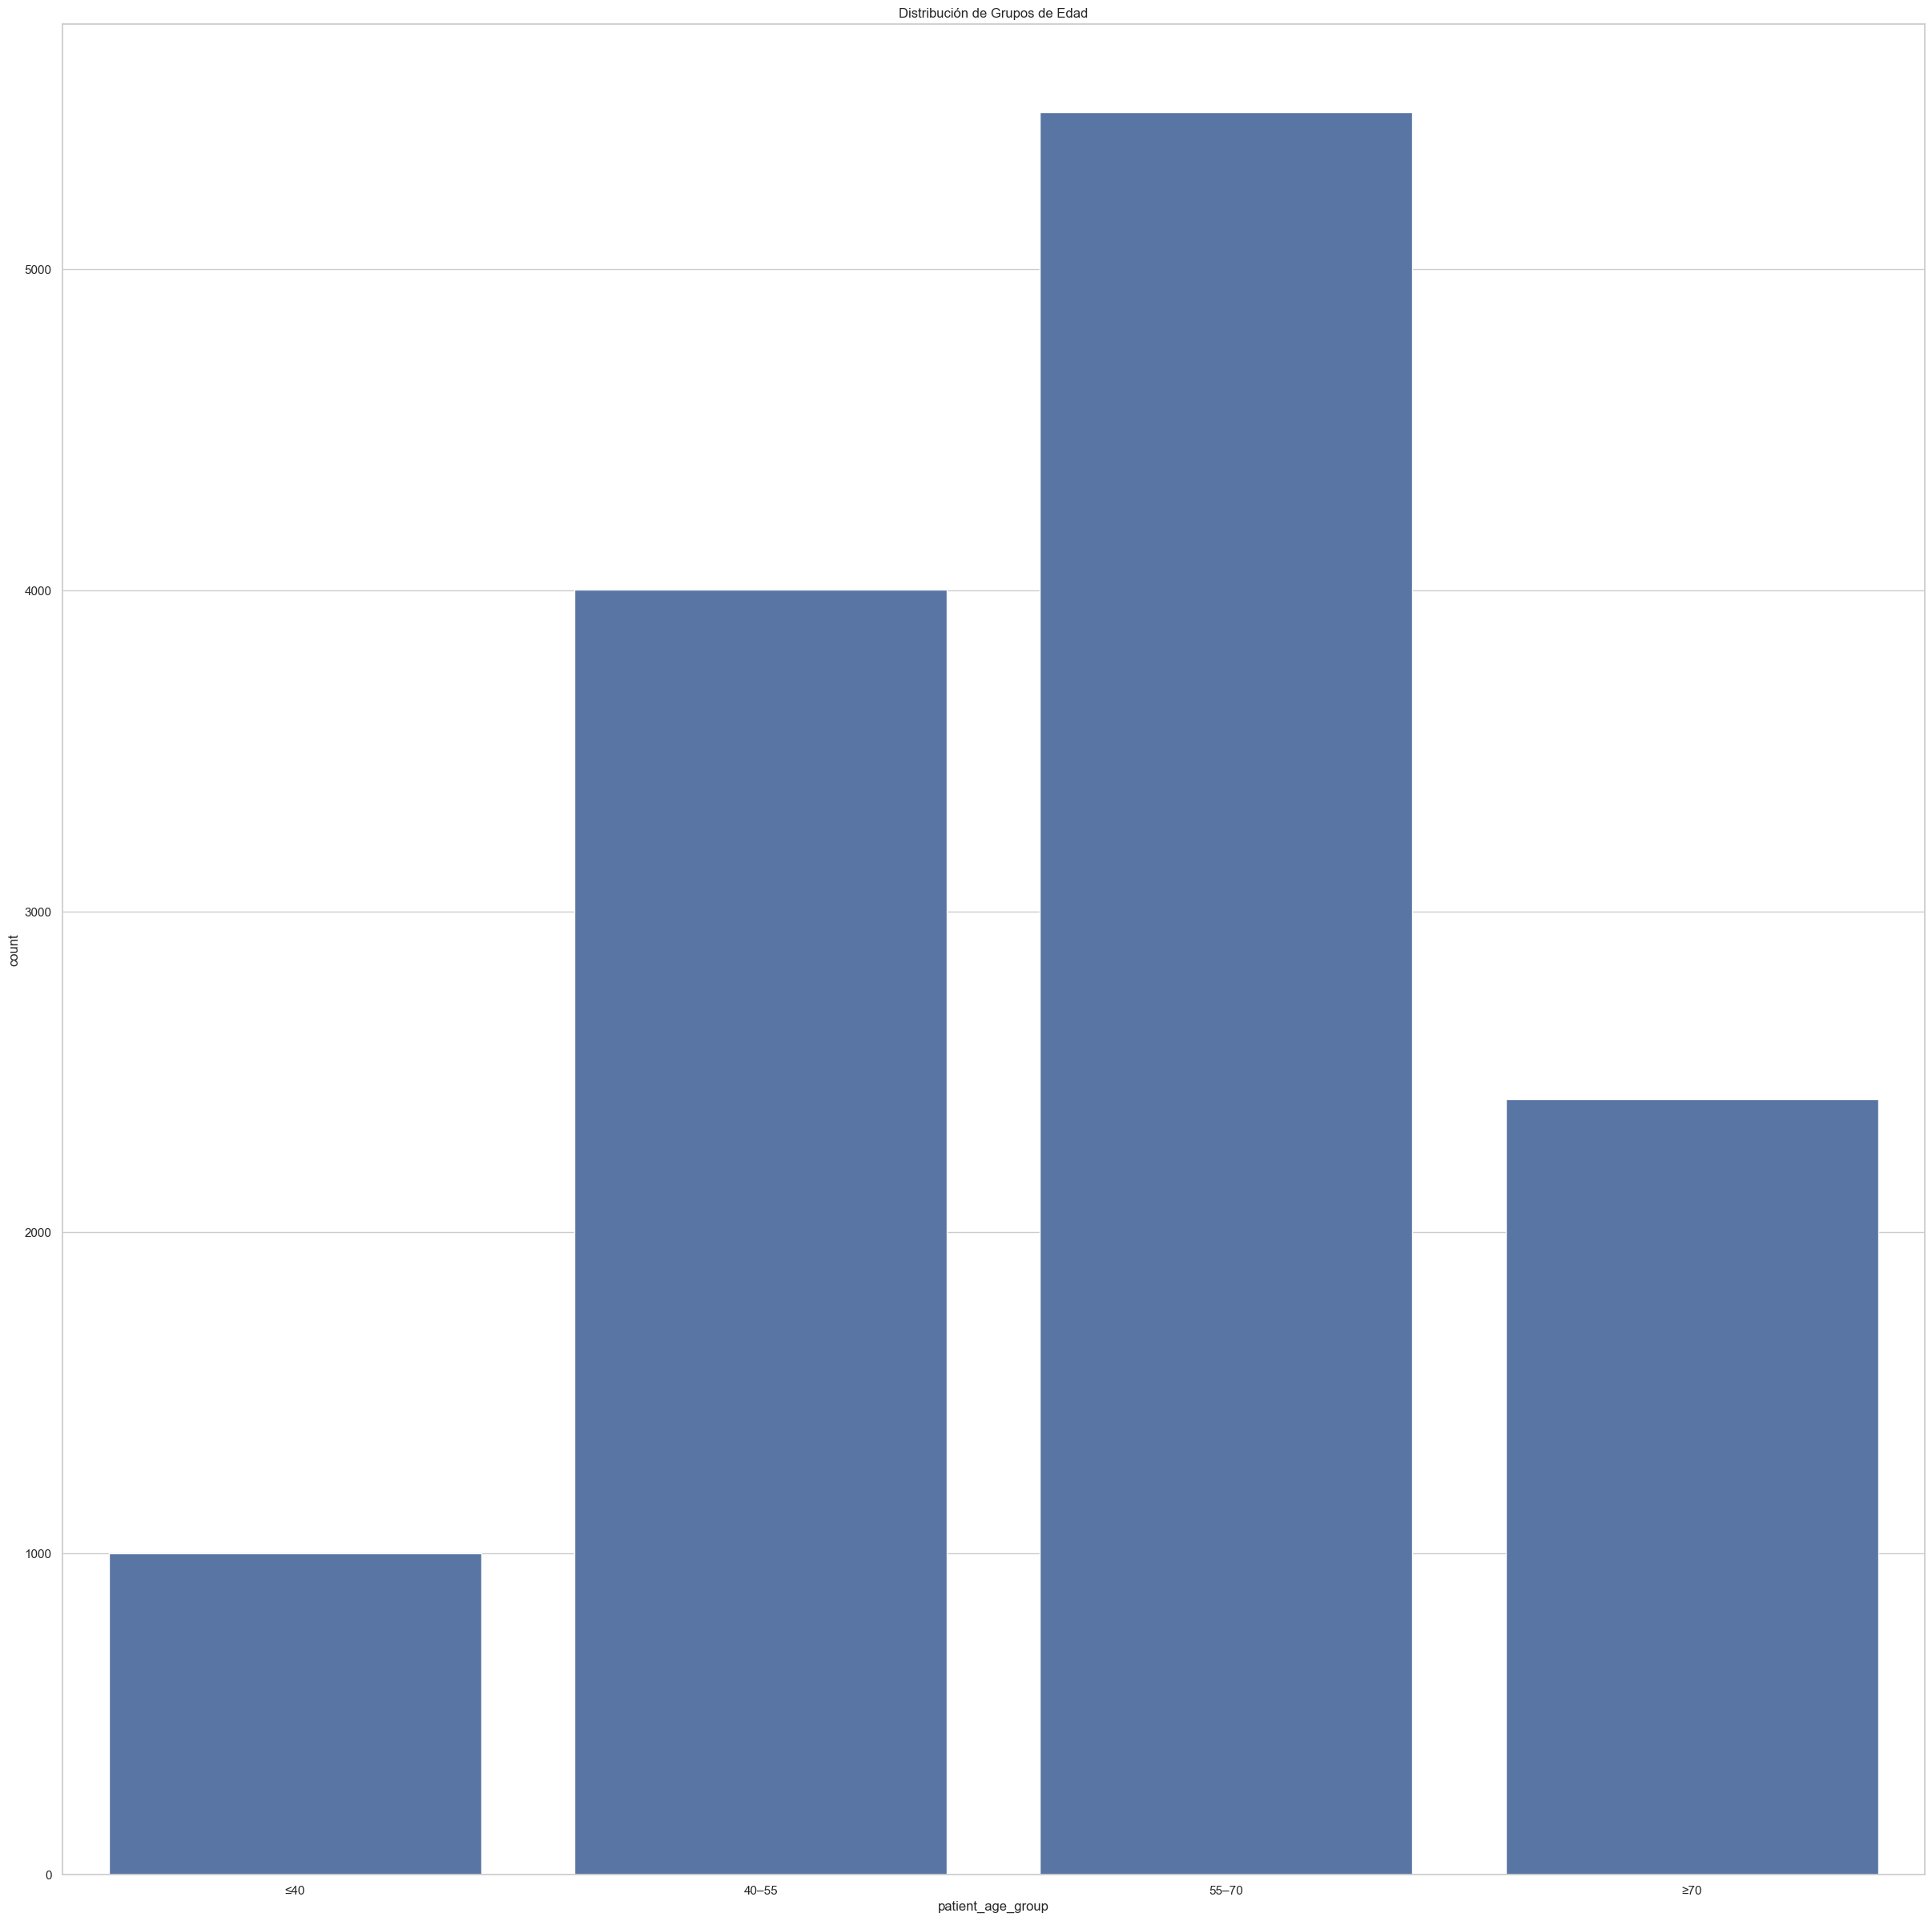

In [47]:
# Graficamos la distribuciones por grupos de edad
sns.countplot(data=df_train, x="patient_age_group")
plt.title("Distribución de Grupos de Edad")
plt.show()

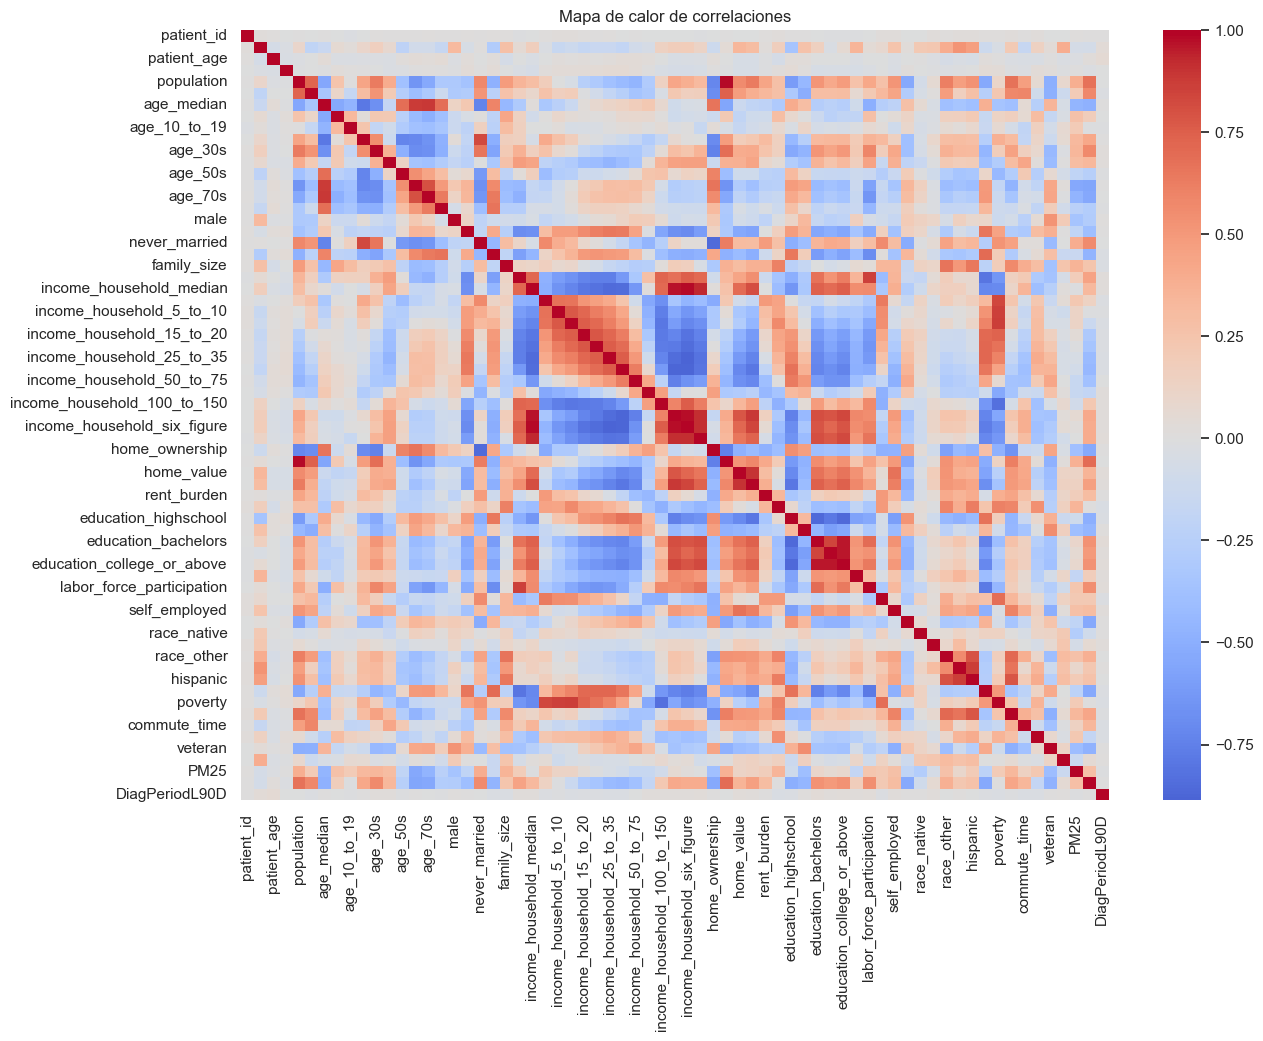

In [48]:
# Mostramos un mapa de calor de las correlaciones
plt.figure(figsize=(14, 10))
corr = df_train.select_dtypes(include="number").corr()

sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones")
plt.show()

In [49]:
# Correlación con la variable objetivo
corr_target = (
    df_train.select_dtypes(include="number")
            .corr()["DiagPeriodL90D"]
            .sort_values(ascending=False)
)

corr_target.head(15)

DiagPeriodL90D                 1.000000
patient_age                    0.055634
education_bachelors            0.037704
patient_zip3                   0.036372
income_individual_median       0.033206
home_value                     0.030163
education_college_or_above     0.029082
labor_force_participation      0.028169
income_household_100_to_150    0.025316
income_household_median        0.025300
income_household_75_to_100     0.024994
rent_median                    0.024770
self_employed                  0.023837
income_household_six_figure    0.023361
family_dual_income             0.022012
Name: DiagPeriodL90D, dtype: float64

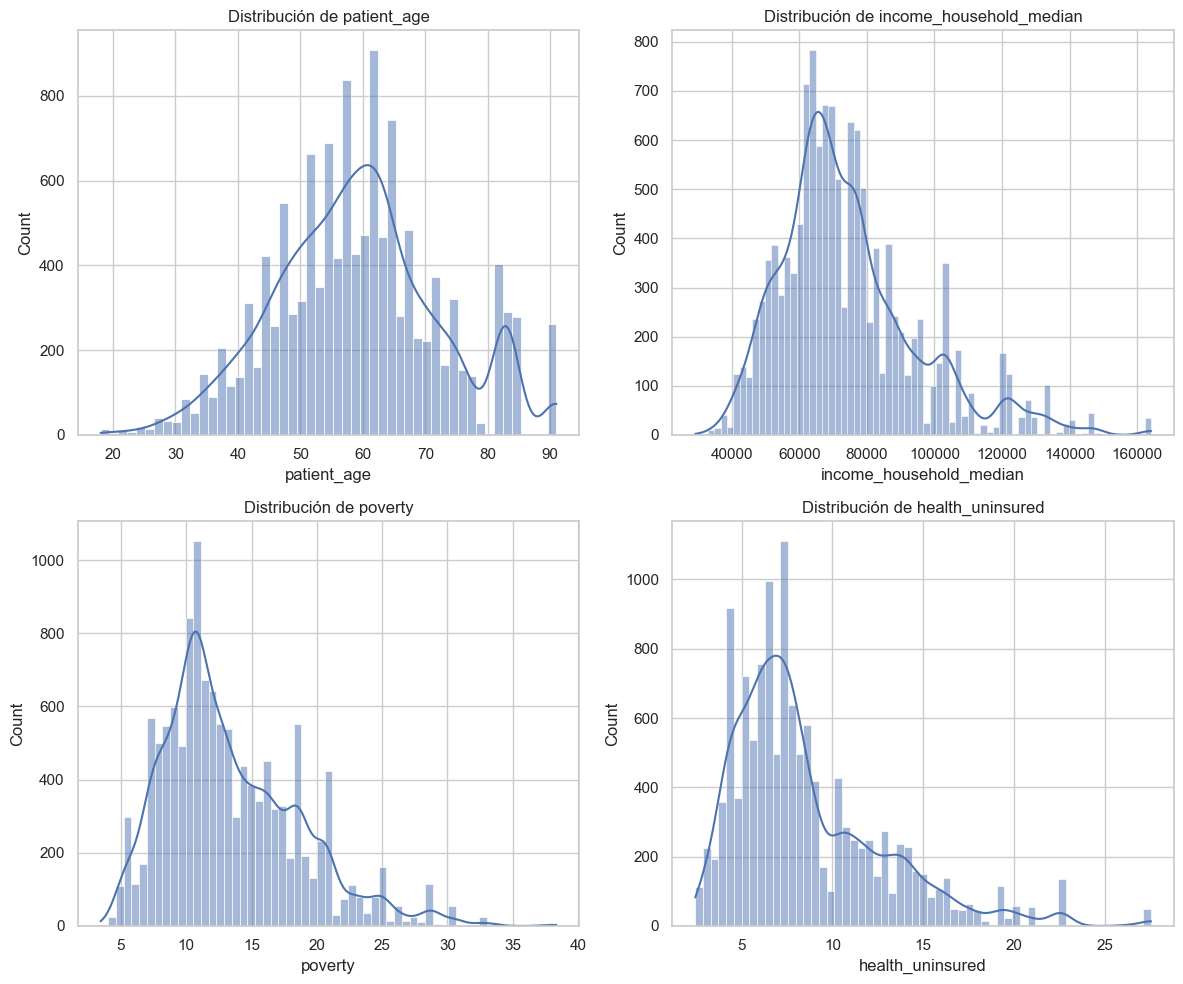

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# patient_age
sns.histplot(df_train["patient_age"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribución de patient_age")

# income_household_median
sns.histplot(df_train["income_household_median"], kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribución de income_household_median")

# poverty
sns.histplot(df_train["poverty"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribución de poverty")

# health_uninsured
sns.histplot(df_train["health_uninsured"], kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribución de health_uninsured")

plt.tight_layout()
plt.show()


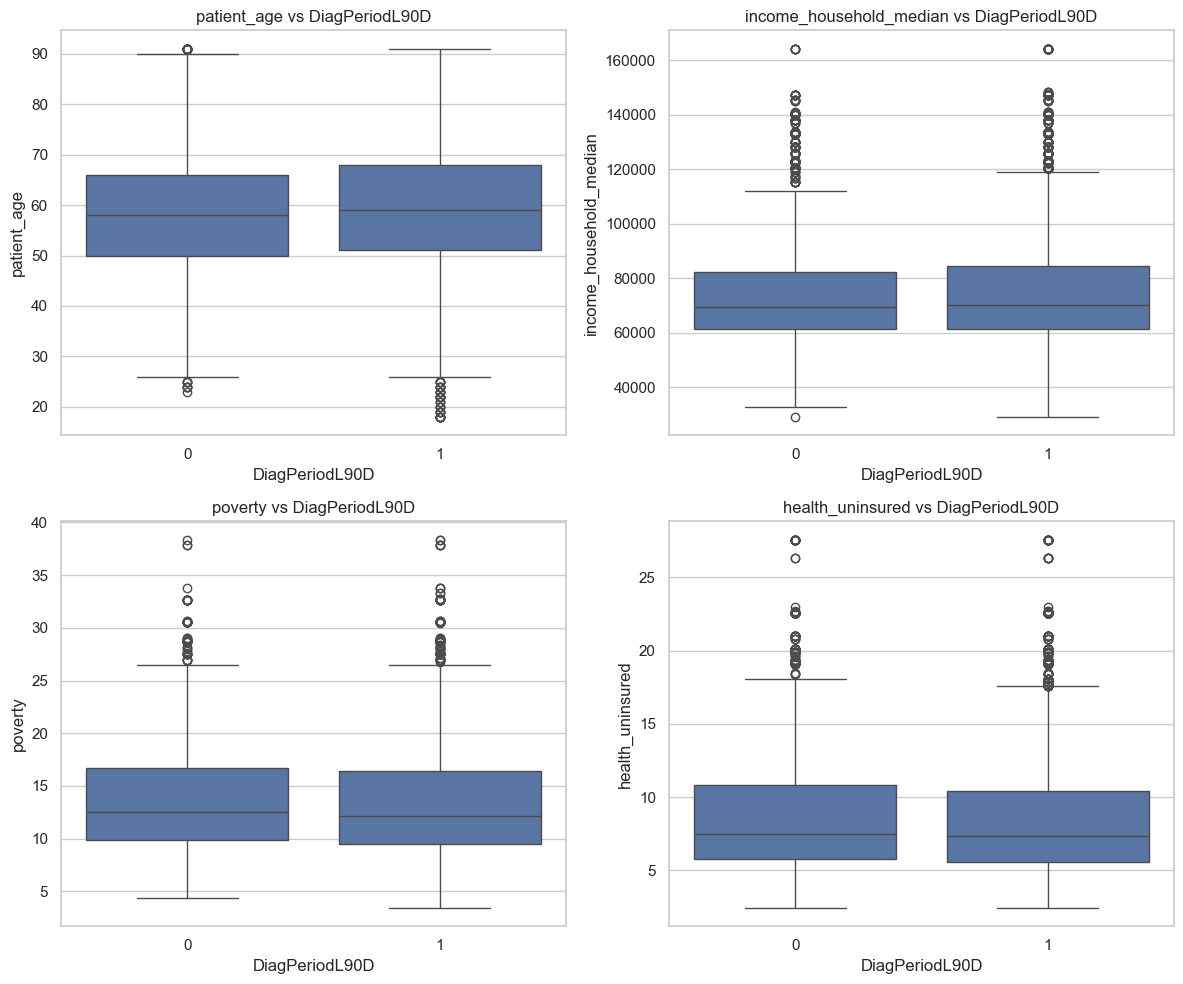

In [51]:
vars_num = ["patient_age", "income_household_median", "poverty", "health_uninsured"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=df_train, x="DiagPeriodL90D", y="patient_age", ax=axes[0,0])
axes[0,0].set_title("patient_age vs DiagPeriodL90D")

sns.boxplot(data=df_train, x="DiagPeriodL90D", y="income_household_median", ax=axes[0,1])
axes[0,1].set_title("income_household_median vs DiagPeriodL90D")

sns.boxplot(data=df_train, x="DiagPeriodL90D", y="poverty", ax=axes[1,0])
axes[1,0].set_title("poverty vs DiagPeriodL90D")

sns.boxplot(data=df_train, x="DiagPeriodL90D", y="health_uninsured", ax=axes[1,1])
axes[1,1].set_title("health_uninsured vs DiagPeriodL90D")

plt.tight_layout()
plt.show()


### 5. Conclusiones y preparación para modelado

Al hacer este EDA, estos son los hallazgos principales que encontré:

- Hay columnas con muchos valores nulos, estas variables pueden no aportan mucha información y probablemente conviene eliminarlas.
- Los outliers que aparecen a simple vista parecen naturales para datos reales.
- Las distribuciones mostraron que los pacientes suelen tener entre 50 y 70 años y que viven en zonas con ingresos medianos alrededor de 60k–80k dolares.
- Variables socioeconómicas como "poverty" y "health_uninsured" si tienen variación, pero al compararlas con la variable objetivo "DiagPeriodL90D" no se observan diferencias claras entre los diagnosticados temprano y tarde.
- El mapa de calor y la correlación con el target confirmaron que no hay relaciones numéricas fuertes. Al parecer el target no depende de una sola variable, probablemente depende de una combinación de muchas variables.

Las variables que me parecen más útiles para este modelo son:

- patient_age: la edad es una variable importante en temas de salud
- income_household_median: representa el nivel socioeconómico del área y podemos relacionarlo con diagnosticos tempranos o tardios
- poverty: nos habla de las condiciones sociales que podrían afectar el acceso a salud.
- health_uninsured: indica disponibilidad de seguro medico en la zona.
- BMI: el indice de masa corporal si puede tener correlación en enfermedades como el cancer.

Las variables que necesitan codificación o limpieza son:

- Columnas con muchos valores faltantes (más del 30%) deberían eliminarse si se define que no son relevantes para el modelo.
- Columnas numéricas con variación mínima también podrían descartarse.
- Variables categóricas deben estar definidas como "category" para preparar su codificación.
- Variables con valores muy extremos podrian requerir algún tratamiento si afectan al modelo.


Durante el análisis se hicieron algunas transformaciones básicas

- Imputación de BMI: rellené los valores nulos con la mediana.
- Creación de patient_age_group: agrupé la edad en rangos para que sea mas facil el analisis.
- Conversión de columnas a tipo category: como "married", "female" y "raza".
- Eliminación de variables que no son relevantes: identifiqué columnas con demasiados nulos o poco valor.
